[![pythonista](img/pythonista.png)](https://www.pythonista.io)

# Declaraciones de obtención de datos.

https://spark.apache.org/docs/latest/sql-ref-syntax.html#data-retrieval-statements

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Intro a SELECT").getOrCreate()
ct = spark.sparkContext

In [ ]:
%load_ext sparksql_magic

In [ ]:
(spark.read.parquet('data/data_covid.parquet')
     .createOrReplaceTempView("COVID_NACIONAL"))

In [ ]:
(spark.read
     .option('header','true')
     .option('inferSchema', 'true')
     .csv('data/IRIS.csv')
     .createOrReplaceTempView("Iris"))

## La declaración ```SELECT```.

https://spark.apache.org/docs/latest/sql-ref-syntax-qry-select.html

In [ ]:
%%sparksql  --cache
SELECT 1 + 2 AS suma;

In [ ]:
%%sparksql --cache df
SELECT col1 * 2 FROM VALUES 1, 2, 3, 4;

In [ ]:
df

In [ ]:
%%sparksql --cache
SELECT * FROM IRIS;

### Uso de ```SELECT``` ... ```FROM```.

```
SELECT <elementos>
FROM <fuentes>
```

### ```SELECT *```

In [ ]:
%%sparksql --cache
SELECT *
FROM COVID_NACIONAL;

In [ ]:
%%sparksql --cache
SELECT *
FROM COVID_NACIONAL;

In [ ]:
%%sparksql --cache
SELECT *
FROM COVID_NACIONAL;

### Selección de columnas específicas.

```
SELECT <col 1>, <col 2>, ... <col n>
```

In [ ]:
%%sparksql --cache
SELECT
    Aguascalientes, 
    Nacional
FROM COVID_NACIONAL;

In [ ]:
%%sparksql --cache
SELECT 
    Index,
    Aguascalientes,
    Nacional
FROM COVID_NACIONAL;

## Operaciones con columnas.

Es posible realizar diversas operaciones mediante expresiones que impliquen a columnas desde un ```SELECT``` mediante el uso de varias funciones y operadores.
```
SELECT <expresion 1>, <expresion 2> ... <expresion n>
```

In [ ]:
%%sparksql --cache
SELECT
    Nacional / 32
FROM COVID_NACIONAL;

## Funciones.

https://spark.apache.org/docs/latest/sql-ref-functions.html

In [ ]:
%%sparksql --cache
SELECT
    CONCAT( 'dia ', Index)
FROM COVID_NACIONAL;

### Funciones de agregación.

https://spark.apache.org/docs/latest/sql-ref-functions-builtin.html#aggregate-functions

In [ ]:
%%sparksql --cache
SELECT 
    AVG(AGUASCALIENTES)
FROM COVID_NACIONAL;

## Funciones de tiempo. 

In [ ]:
%%sparksql --cache
SELECT 
    EXTRACT( 'YEAR', Index),
    Index
             FROM COVID_NACIONAL;
             ''').toPandas()

## Uso de ```AS```.

In [ ]:
spark.sql('''
            SELECT 
                AGUASCALIENTES AS Ags, 
                Nacional / 32 AS Promedio
             FROM COVID_NACIONAL;
             ''').toPandas()

### Uso de referencias.

Uso del punto (```.```) para elementos en una tablas.

In [ ]:
spark.sql('''SELECT
                 COV.AGUASCALIENTES AS Ags 
             FROM COVID_NACIONAL AS COV;
             ''').toPandas()

### Selección de columnas de más de una tabla.

In [ ]:
spark.sql('''
            SELECT 
                Index, 
                Nacional /32 AS promedio
            FROM COVID_NACIONAL;
            ''').createOrReplaceTempView('Promedio_Nacional')

In [ ]:
spark.sql('''
            SELECT
                p.Index,
                c.Nacional,
                p.promedio 
            FROM 
                COVID_NACIONAL AS c, 
                Promedio_Nacional AS p;
            ''').toPandas()

## Uso de ```LIMIT```.

* La siguiente delcaración regresará los ```20``` primeros registros resultantes de la búsqueda en la columna ```Nacional```.

In [ ]:
spark.sql('''
            SELECT 
                Nacional
            FROM COVID_NACIONAL
            LIMIT 20;
            ''').toPandas()

## Uso de ```WHERE```.

https://spark.apache.org/docs/latest/sql-ref-syntax-qry-select-where.html

In [ ]:
spark.sql('''
            SELECT
                Index,
                Aguascalientes,
                Nacional / 32 as promedio
             FROM COVID_NACIONAL
             WHERE Aguascalientes > Nacional / 32;
             ''').toPandas()

In [ ]:
spark.sql('''
            SELECT *
            FROM COVID_NACIONAL
            WHERE Index = '2020-03-25';
            ''').toPandas()

### Uso de ```AND```.

In [ ]:
spark.sql('''
            SELECT
                Index,
                Aguascalientes
            FROM COVID_NACIONAL
            WHERE AGUASCALIENTES > Nacional / 32 AND AGUASCALIENTES > 100;
            ''').toPandas()

### Uso de ```OR```.

In [ ]:
spark.sql('''
            SELECT 
                Index, 
                Aguascalientes
            FROM COVID_NACIONAL
            WHERE AGUASCALIENTES > Nacional / 32 OR AGUASCALIENTES = 0;
            ''').toPandas()

### Uso de ```BETWEEN```.

In [ ]:
spark.sql('''
            SELECT 
                Index,
                Aguascalientes
            FROM COVID_NACIONAL
            WHERE Aguascalientes BETWEEN 100 AND 500;
            ''').toPandas()

In [ ]:
spark.sql('''
            SELECT
                Index,
                Aguascalientes
            FROM COVID_NACIONAL
            WHERE Index BETWEEN '2021-01-01' AND '2021-01-15';
            ''').toPandas()

### Uso de ```IN```. 

In [ ]:
spark.sql('''
            SELECT
                Index,
                Nacional
            FROM COVID_NACIONAL
            WHERE Nacional IN (50, 100, 150, 200, 250, 300);
            ''').toPandas()

### Uso de ```NOT IN```. 

In [ ]:
spark.sql('''
            SELECT
                Index,
                NAcional
            FROM COVID_NACIONAL
            WHERE Index BETWEEN '2022-04-20' AND '2022-04-25'
                AND Nacional NOT IN (50, 100, 150, 200, 250, 300);
            ''').toPandas()

### Uso de ```IS NULL```. 

In [ ]:
spark.sql('''
            SELECT
                Index,
                Aguascalientes
            FROM COVID_NACIONAL
            WHERE Aguascalientes IS NULL;
            ''').toPandas()

### Uso de ```IS NOT NULL```.

In [ ]:
spark.sql('''
            SELECT
                Index,
                Aguascalientes
            FROM COVID_NACIONAL
            WHERE Aguascalientes IS NOT NULL;
            ''').toPandas()

In [ ]:
spark.sql('''
            SELECT explode((1,2,3)) AS arreglo;
            ''').toPandas()

## Uso de ```ORDER BY```.

In [ ]:
spark.sql('''
            SELECT
                Index,
                Aguascalientes,
                Nacional
             FROM COVID_NACIONAL
             WHERE Index BETWEEN '2021-01-01' AND '2021-01-15'
             ORDER BY Nacional;
             ''').toPandas()

In [ ]:
spark.sql('''
            SELECT
                Index,
                Aguascalientes,
                Nacional
            FROM COVID_NACIONAL
            WHERE Index BETWEEN '2021-01-01' AND '2021-01-15'
            ORDER BY Nacional DESC;
            ''').toPandas()

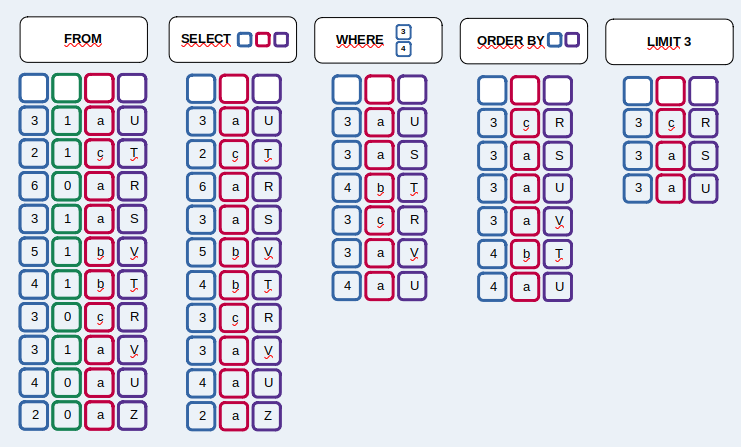

## ```GROUP BY```

In [ ]:
spark.sql('''
            SELECT
                species,
                COUNT(species) 
            FROM Iris
            GROUP BY species;
            ''').toPandas()

In [ ]:
spark.sql('''
            SELECT
                species,
                MEAN(sepal_length) 
            FROM Iris
            GROUP BY species;
            ''').toPandas()

### ```HAVING```

In [ ]:
spark.sql('''SELECT species, MEAN(sepal_length) as sepal_media
             FROM Iris
             GROUP BY species
             HAVING sepal_media < 6;
          ''').toPandas()

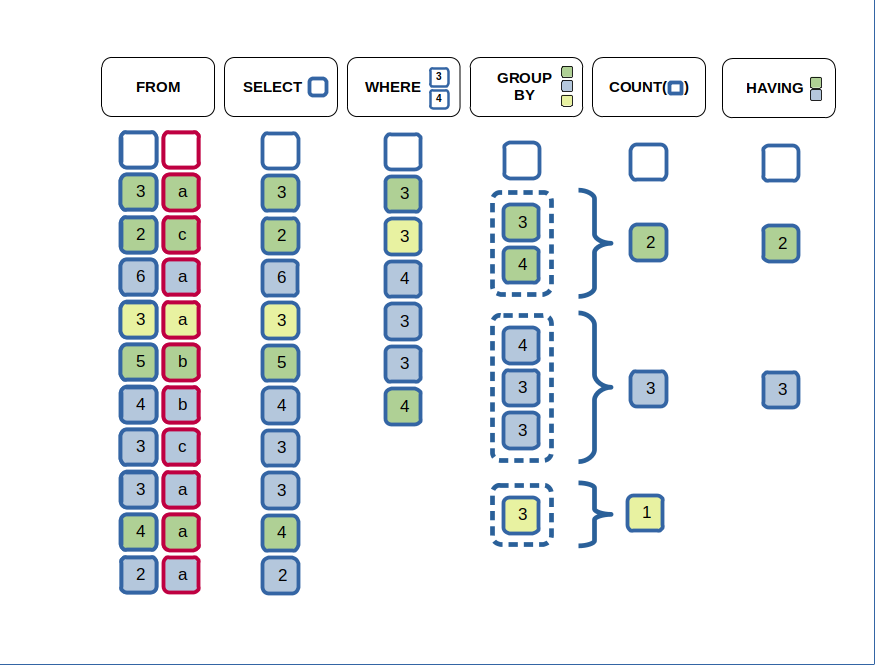

## ```CASE```

https://spark.apache.org/docs/latest/sql-ref-syntax-qry-select-case.html

In [ ]:
spark.sql('''SELECT Index, Nacional,
             CASE WHEN Nacional = 0 THEN "ninguno"
                 WHEN NACIONAL > 10000 THEN "alto"
                 ELSE "normal"
             END AS categoria
             FROM COVID_NACIONAL
             WHERE Index BETWEEN '2021-01-01' AND '2021-01-15'
             ''').toPandas()

In [ ]:
spark.stop()

<p style="text-align: center"><a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Licencia Creative Commons Atribución 4.0 Internacional</a>.</p>
<p style="text-align: center">&copy; José Luis Chiquete Valdivieso. 2023.</p>